# Introduction 
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms in 1981. Each species can be identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.  
So there 2 classes. Poisonous and edible.  

I will use 6 classification models to predict.

I also added explanations to models so that I can learn better. I would be glad if you say my mistakes.


## Content:

1. [Import Libraries](#1)
2. [Load the Data](#2)
3. [Variable Descriptions](#3)
4. [Encoding Categorical Data](#4)
5. [Train Test Split](#5)
6. [Feature Scaling](#6)
7. [Classification Models](#7)
  * [Logistic Regression Model](#8)
  * [Kernel SVM Model](#9)
  * [Naive Bayes Model](#10)
  * [Decision Tree Classification Model](#11)
  * [Random Tree Classification Model](#12)
  * [K-Nearest Neighbors(K-NN) Model](#13)
8. [Results](#14)


<a id = 1> </a>
# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id = 2> </a>
# Load the Data

In [ ]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df

In [ ]:
df.info()

You can see percentages of edible and poisonous mushrooms.

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(df['class'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Edible', 'Poisonous'], shadow = True)
plt.show()

All columns are object. So we need to encode them.

## Set dependent and independent variable

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

## Check if there is null value.

In [ ]:
df.notnull().all()

As you can see above, there is no null value in our dataset.

<a id = 3> </a>
# Variable Descriptions


Attribute Information: (classes: edible = e, poisonous = p)
1. cap-shape: bell = b, conical = c,convex = x, flat = f, knobbed = k, sunken = s
2. cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s
3. cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
4. bruises: yes = t, no = f
5. odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
6. gill-attachment: attached = a, descending = d, free = f, notched = n
7. gill-spacing: close = c, crowded = w, distant = d
8. gill-size: broad = b, narrow = n
9. gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y
10. stalk-shape: enlarging = e, tapering = t
11. stalk-rootbulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
12. stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
13. stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
14. stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y 
15. stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
16. veil-type: partial = p, universal = u
17. veil-color: brown = n, orange = o, white = w, yellow = y 
18. ring-number: none = n, one = o, two = t
19. ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
20. spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y
21. population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
22. habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d





<a id = 4> </a>
# Encoding Categorical Data
I am going to use Label Encoding for categorical data.

### Encode Independent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df.iloc[:, 1:].apply(le.fit_transform).values


### Encode Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = np.array(le.fit_transform(y))
y.reshape(len(y), 1)

<a id = 5> </a>
# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<a id = 6> </a>
# Feature Scaling
I will use standard scaler.
## [Standard Scaling](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)
Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.  

Differences in the scales across input variables may increase the difficulty of the problem being modeled. An example of this is that large input values (e.g. a spread of hundreds or thousands of units) can result in a model that learns large weight values. A model with large weight values is often unstable, meaning that it may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<a id = 7> </a>
# Classification Models

In these models, I will use formula below. This formula exists as accuracy_score method in sklearn.metric.
![Accuracy](https://lawtomated.com/wp-content/uploads/2019/10/Accuracy_1.png)

In [ ]:
accuracies = dict()

<a id = 8> </a>
## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

#Make Prediction
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

### Plot Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test,display_labels=['Edible', 'Posionous'],cmap= plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

<a id = 9> </a>
# Kernel SVM

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. [Click to see detailed information.](https://scikit-learn.org/stable/modules/svm.html)


In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Kernel SVM'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

### Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Posionous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

<a id = 10> </a>
# Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.  [Click to see detailed information.](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

### Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Posionous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

<a id = 11> </a>
# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Decision Tree Classification'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

### Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

<a id = 12> </a>
# Random Tree Classification

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. [Click to see detailed information.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators= 2, random_state= 0)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['Random Tree Classification'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

### Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

<a id = 13> </a>
# K-Nearest Neighbors(K-NN)

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
[Click here to see detailed information.](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)  

Here I used Euclidean distance. You can find its formula below:
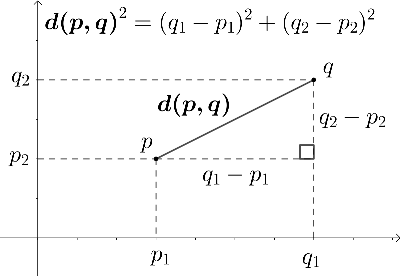

metric = 'minkowski', p = 2 means Euclidean distance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

#Make Prediction
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracies['K-Nearest Neighbors'] = accuracy_score(y_test, y_pred)
print('Accuracy is: ' + str(accuracy_score(y_test, y_pred)))

### Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Mushroom Dataset")
plt.show()

<a id = 14> </a>
# Results

In [ ]:
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy Score']) 
accuracy_df

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.set_color_codes("pastel")
sns.barplot(y="Model Name", x="Accuracy Score", data = accuracy_df, color="pink")
plt.show()